In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Our data
x_hours_week = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
y_kg_muscle_gain = np.array([3.1, 5.0, 7.2, 8.9, 11.2, 12.8, 15.2, 17.1, 19.2, 21.0])

x_load_kg = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4,5]).reshape(-1, 1)
y_strength_score = np.array([-20.5, -15.2, -7.6, -0.8, 3.2, 2.1, 4.7, 6.0, 4.9, 1.6,-3.8])

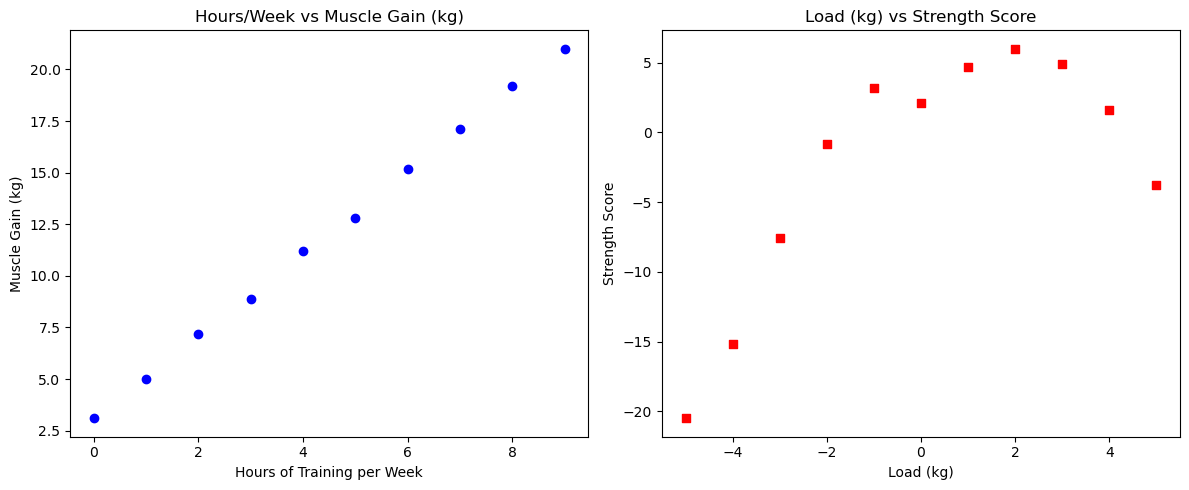

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# 1
axes[0].scatter(x_hours_week, y_kg_muscle_gain, color="blue", marker="o")
axes[0].set_title("Hours/Week vs Muscle Gain (kg)")
axes[0].set_xlabel("Hours of Training per Week")
axes[0].set_ylabel("Muscle Gain (kg)")

# 2
axes[1].scatter(x_load_kg, y_strength_score, color="red", marker="s")
axes[1].set_title("Load (kg) vs Strength Score")
axes[1].set_xlabel("Load (kg)")
axes[1].set_ylabel("Strength Score")

plt.tight_layout()
plt.show()

Equation: y = 2.00x + 3.06
MSE: 0.018
MAE: 0.116
RMSE: 0.134
R²: 0.999


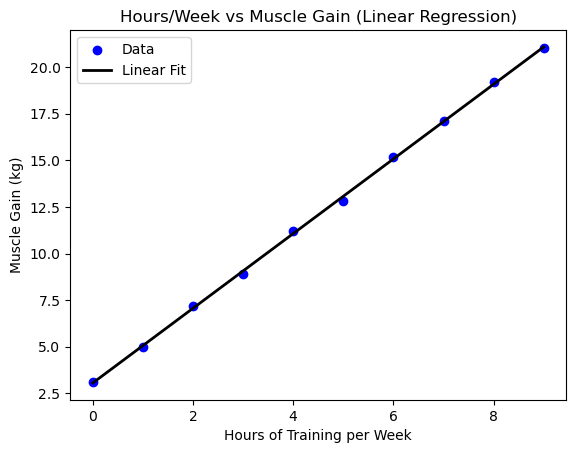

In [22]:
# 1= linear pattern
#fit step
model = LinearRegression()
model.fit(x_hours_week, y_kg_muscle_gain)
# Predictions for line
x_range = np.linspace(0, 9, 100).reshape(-1, 1)
y_pred = model.predict(x_range)
# Print equation
print(f"Equation: y = {model.coef_[0]:.2f}x + {model.intercept_:.2f}")

# Predictions for metrics (use original x)
y_pred_train = model.predict(x_hours_week)
# Metrics

mse = mean_squared_error(y_kg_muscle_gain, y_pred_train)
mae = mean_absolute_error(y_kg_muscle_gain, y_pred_train)
rmse = np.sqrt(mse)
r2 = r2_score(y_kg_muscle_gain, y_pred_train)

print(f"MSE: {mse:.3f}")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")

# Plot
plt.scatter(x_hours_week, y_kg_muscle_gain, color="blue", label="Data")
plt.plot(x_range, y_pred, color="black", linewidth=2, label="Linear Fit")
plt.title("Hours/Week vs Muscle Gain (Linear Regression)")
plt.xlabel("Hours of Training per Week")
plt.ylabel("Muscle Gain (kg)")
plt.legend()
plt.show()

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Our data
# Train/Test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    x_load_kg, y_strength_score, test_size=0.2, random_state=42
)
# Create polynomial regression model (degree 2) -- see explanation below
polynomial_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])

# Train on train data only
polynomial_model.fit(X_train, y_train)

# Predictions
y_train_pred = polynomial_model.predict(X_train)
y_test_pred = polynomial_model.predict(X_test)


# Adjusted R² function
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Number of predictors after polynomial expansion
p = PolynomialFeatures(degree=2).fit(X_train).n_output_features_

# Train metrics
n_train = X_train.shape[0]
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = adjusted_r2(r2_train, n_train, p)

# Test metrics
n_test = X_test.shape[0]
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = adjusted_r2(r2_test, n_test, p)

# Print results separately
print("=== Train Metrics ===")
print(f"MSE: {mse_train:.4f}")
print(f"MAE: {mae_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"R²: {r2_train:.4f}")
print(f"Adjusted R²: {adj_r2_train:.4f}")

print("\n=== Test Metrics ===")
print(f"MSE: {mse_test:.4f}")
print(f"MAE: {mae_test:.4f}")
print(f"RMSE: {rmse_test:.4f}")
print(f"R²: {r2_test:.4f}")
print(f"Adjusted R²: {adj_r2_test:.4f}\n")
# Get the coefficients
coefficients = polynomial_model.named_steps['linear'].coef_
a = coefficients[2]  # coefficient for x^2
b = coefficients[1]  # coefficient for x
c = polynomial_model.named_steps['linear'].intercept_

print(f"Intercept (β₀): {c:.2f}")
print(f"Coefficient for x (β₁): {b:.2f}")
print(f"Coefficient for x² (β₂): {a:.2f}")
# Equation
equation = f"y =   ({a:.2f})x²+({b:.2f})x+{c:.2f}"
print(f"Polynomial equation: {equation}")

x_vertex = -b / (2*a)
y_vertex = a*x_vertex**2 + b*x_vertex + c
print(f"Vertex: x* = {x_vertex:.4f}, y* = {y_vertex:.4f}")

=== Train Metrics ===
MSE: 0.6170
MAE: 0.5931
RMSE: 0.7855
R²: 0.9872
Adjusted R²: 0.9777

=== Test Metrics ===
MSE: 6.0922
MAE: 2.2031
RMSE: 2.4682
R²: 0.9451
Adjusted R²: 1.1097

Intercept (β₀): 5.16
Coefficient for x (β₁): 1.96
Coefficient for x² (β₂): -0.75
Polynomial equation: y =   (-0.75)x²+(1.96)x+5.16
Vertex: x* = 1.3024, y* = 6.4374


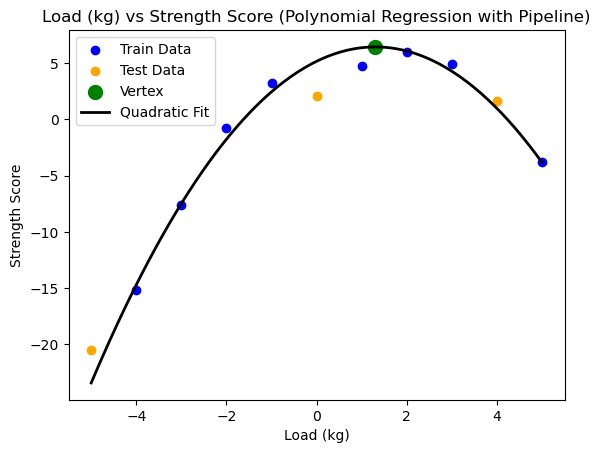

In [6]:
# Predictions for smooth curve (full range)
x_range = np.linspace(-5, 5, 200).reshape(-1, 1)
y_range_pred = polynomial_model.predict(x_range)
# Plot
plt.scatter(X_train, y_train, color="blue", label="Train Data")
plt.scatter(X_test, y_test, color="orange", label="Test Data")
plt.scatter(x_vertex, y_vertex, color='green', s=100, label='Vertex')
plt.plot(x_range, y_range_pred, color="black", linewidth=2, label="Quadratic Fit")
plt.title("Load (kg) vs Strength Score (Polynomial Regression with Pipeline)")
plt.xlabel("Load (kg)")
plt.ylabel("Strength Score")
plt.legend()
plt.show()
